In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

## 5. Random Forest

### 5.1 Random Forest Regressor

In [40]:
train = pd.read_csv('project_train.csv')
test = pd.read_csv('project_test.csv')

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  2520 non-null   int64  
 1   County                      2520 non-null   object 
 2   MonthNumeric                2520 non-null   int64  
 3   Year                        2520 non-null   int64  
 4   MedianPrice                 2520 non-null   float64
 5   PercentageOfBachelorDegree  2520 non-null   float64
 6   Per_capita_income           2520 non-null   int64  
 7   total_law_enforcement       2520 non-null   float64
 8   Precipitation               2520 non-null   float64
 9   Population                  2520 non-null   float64
 10  NumAirports                 2520 non-null   float64
 11  GradRates                   2520 non-null   float64
 12  CollegeEnrollmentRate       2520 non-null   float64
 13  AvgHouseholdSize            2520 

In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1260 non-null   int64  
 1   County                      1260 non-null   object 
 2   MonthNumeric                1260 non-null   int64  
 3   Year                        1260 non-null   int64  
 4   MedianPrice                 1260 non-null   float64
 5   PercentageOfBachelorDegree  1260 non-null   float64
 6   Per_capita_income           1260 non-null   int64  
 7   total_law_enforcement       1260 non-null   float64
 8   Precipitation               1260 non-null   float64
 9   Population                  1260 non-null   float64
 10  NumAirports                 1260 non-null   float64
 11  GradRates                   1260 non-null   float64
 12  CollegeEnrollmentRate       1260 non-null   float64
 13  AvgHouseholdSize            1260 

In [43]:
train = train.drop(columns = ['Unnamed: 0', 'MajorIndustry', 'County', 'MonthNumeric', 'Year'], axis =1) 
test = test.drop(columns = ['Unnamed: 0', 'MajorIndustry', 'County', 'MonthNumeric', 'Year'], axis =1) 

In [45]:
y_train = train['MedianPrice']
X_train = train.drop(['MedianPrice'], axis=1)
y_test = test['MedianPrice']
X_test = test.drop(['MedianPrice'], axis=1)

In [46]:
X_train.shape, X_test.shape

((2520, 20), (1260, 20))

In [53]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_features=5, min_samples_leaf=5
                            , n_estimators = 500, random_state=88, verbose=2) 
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

building tree 360 of 500
building tree 361 of 500
building tree 362 of 500
building tree 363 of 500
building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500
building tree 380 of 500
building tree 381 of 500
building tree 382 of 500
building tree 383 of 500
building tree 384 of 500
building tree 385 of 500
building tree 386 of 500
building tree 387 of 500
building tree 388 of 500
building tree 389 of 500
building tree 390 of 500
building tree 391 of 500
building tree 392 of 500
building tree 393 of 500
building tree 394 of 500
building tree 395 of 500
building tree 396 of 500
building tree 397 of 500
building tree 398 of 500
building tree 399 of 500


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.1s finished


RandomForestRegressor(max_features=5, min_samples_leaf=5, n_estimators=500,
                      random_state=88, verbose=2)

In [146]:
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [98]:
def MAE(y_test, y_pred):
    return (np.mean(abs(y_test - y_pred)))

In [99]:
def RMSE(y_test, y_pred):
    return np.sqrt(np.mean((y_test - y_pred)**2))

In [100]:
rf.verbose = False

print('OSR2:', round(OSR2(rf, X_test, y_test, y_train), 5))

OSR2: 0.89552


In [101]:
y_pred_rf = rf.predict(X_test)

print("Test OSR2 for Random Forest:", OSR2(rf, X_test, y_test, y_train))
print("Test MAE for Random Forest:", MAE(y_pred_rf, y_test))
print("Test RMSE for Random Forest:", RMSE(y_test, y_pred_rf))

Test OSR2 for Random Forest: 0.8955198756792859
Test MAE for Random Forest: 74161.24538765737
Test RMSE for Random Forest: 110252.58413088993


In [56]:
pd.DataFrame({'Feature' : X_train.columns, 
              'Importance score': 100*rf.feature_importances_}).round(1)

,Feature,Importance score
0,PercentageOfBachelorDegree,17.5
1,Per_capita_income,30.2
2,total_law_enforcement,2.0
3,Precipitation,2.0
4,Population,2.8
5,NumAirports,4.5
6,GradRates,1.4
7,CollegeEnrollmentRate,5.2
8,AvgHouseholdSize,1.5
9,Avg18Younger,2.4


### 5.2 Random Forest Regressor with cv

In [66]:
## using GridSearchCV to find best max_features:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import time

grid_values = {'max_features': np.linspace(1,18,18, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [88]} 

tic = time.time()

rf2 = RandomForestRegressor() 
# Note: here we set verbose=2 to keep track of the progress (the running time) of the cross validation. 
cv = KFold(n_splits=5,random_state=333,shuffle=True) 
rf_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='r2', cv=cv,verbose=2)
rf_cv.fit(X_train, y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.7s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.7s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.7s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.7s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.6s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.7s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.7s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.7s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.8s
[CV] END max_features=2, min_samples_leaf=5, n_e

[CV] END max_features=17, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   2.0s
[CV] END max_features=17, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   2.0s
[CV] END max_features=17, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   2.1s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   2.1s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   2.2s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   2.2s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   2.1s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   2.1s
time: 121.71 s


(0.9775, 0.979)

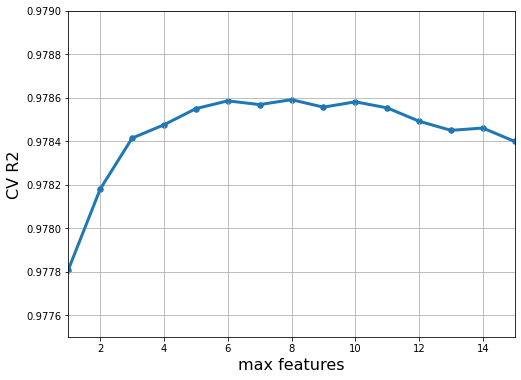

In [133]:
max_features = rf_cv.cv_results_['param_max_features'].data
R2_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(max_features, R2_scores, s=30)
plt.plot(max_features, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([1, 15])
plt.ylim([0.9775, 0.9790])

In [62]:
print(rf_cv.best_params_)

{'max_features': 8, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 88}


In [63]:
print('Cross-validated R2:', round(rf_cv.best_score_, 5))
print('OSR2:', round(OSR2(rf_cv, X_test, y_test, y_train), 5))

Cross-validated R2: 0.97859
OSR2: 0.90957


In [105]:
y_pred_rf_cv = rf_cv.predict(X_test)

print("Test OSR2 for Random Forest with cv:", OSR2(rf_cv, X_test, y_test, y_train))
print("Test MAE for Random Forest with cv:", MAE(y_pred, y_pred_rf_cv))
print("Test RMSE for Random Forest with cv:", RMSE(y_test, y_pred_rf_cv))

Test OSR2 for Random Forest with cv: 0.9095706577137425
Test MAE for Random Forest with cv: 25313.742503103862
Test RMSE for Random Forest with cv: 102571.4802620383


In [106]:
pd.DataFrame({'Feature' : X_train.columns,  +
              'Importance score': 100*rf_cv.best_estimator_.feature_importances_}).round(1)

,Feature,Importance score
0,PercentageOfBachelorDegree,19.8
1,Per_capita_income,43.3
2,total_law_enforcement,1.3
3,Precipitation,1.7
4,Population,1.8
5,NumAirports,3.8
6,GradRates,0.6
7,CollegeEnrollmentRate,2.7
8,AvgHouseholdSize,0.8
9,Avg18Younger,1.3


## 6. Gradient Boosted Trees

### 6.1 Gradient Boosting Regressor

In [67]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=2000, learning_rate= 0.001, max_leaf_nodes=3,
                                max_depth=10, min_samples_leaf=10, random_state=88, verbose=1) 
gbr.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1 46519675044.6790           10.60s
         2 46453154157.2994            7.52s
         3 46386766245.1737            6.46s
         4 46320511042.4843            5.89s
         5 46254388283.9452            5.56s
         6 46188397704.8003            5.37s
         7 46122539040.8232            5.16s
         8 46056812028.3153            5.14s
         9 45991216404.1054            5.04s
        10 45925751905.5484            4.95s
        20 45278261422.9835            4.39s
        30 44643598461.8903            4.18s
        40 44013795735.0400            3.97s
        50 43395237502.8073            3.88s
        60 42785856880.5559            3.83s
        70 42187305842.3091            3.78s
        80 41601216532.1097            3.76s
        90 41023726624.4356            3.78s
       100 40456250391.0989            3.84s
       200 35293000713.7616            3.94s
       300 30915305069.0314            3.68s
       40

GradientBoostingRegressor(learning_rate=0.001, max_depth=10, max_leaf_nodes=3,
                          min_samples_leaf=10, n_estimators=2000,
                          random_state=88, verbose=1)

In [68]:
print('OSR2:', round(OSR2(gbr, X_test, y_test, y_train), 5))

OSR2: 0.75364


In [103]:
y_pred_gbr = gbr.predict(X_test)

print("Test OSR2 for Gradient Boosting:", OSR2(gbr, X_test, y_test, y_train))
print("Test MAE for Gradient Boosting:", MAE(y_pred_gbr, y_test))
print("Test RMSE for Gradient Boosting:", RMSE(y_pred_gbr, y_pred))

Test OSR2 for Gradient Boosting: 0.753641056852906
Test MAE for Gradient Boosting: 105101.03864686155
Test RMSE for Gradient Boosting: 99629.36806015215


### 6.2 Gradient Boosting Regressor with CV

In [69]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True, random_state=88)
kfold_index = [] 
for index in kf.split(X_train):
    kfold_index.append(index)

In [70]:
n_estimators = np.linspace(500, 75*500, 75, dtype='int32')
max_leaf_nodes = np.linspace(2, 10, 9, dtype='int32')

R2_array = np.zeros([len(n_estimators),len(max_leaf_nodes)])
R2_array[:]=np.nan
RMSE_array = np.zeros([len(n_estimators),len(max_leaf_nodes)])
RMSE_array[:]=np.nan
MAE_array = np.zeros([len(n_estimators),len(max_leaf_nodes)])
MAE_array[:]=np.nan
print(R2_array.shape)

(75, 9)


In [71]:
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import time
start = time.time()
for itr in range(len(max_leaf_nodes)):
    depth = max_leaf_nodes[itr]
    print('iter % s, max_depth: %s' % (itr, depth))
    #------begin the 5-fold cross validation ------
    R2_array_cv = np.zeros([len(n_estimators),5])
    R2_array_cv[:]=np.nan
    RMSE_array_cv = np.zeros([len(n_estimators),5])
    RMSE_array_cv[:]=np.nan
    MAE_array_cv = np.zeros([len(n_estimators),5])
    MAE_array_cv[:]=np.nan
    for i in range(5):
        train_idx, val_idx = kfold_index[i]
        X_train_cv = X_train.iloc[train_idx]
        y_train_cv = y_train.iloc[train_idx]
        X_val_cv = X_train.iloc[val_idx]
        y_val_cv = y_train.iloc[val_idx]
        print('   fold-%s, training set size %s, validation set size %s' %(i, len(train_idx), len(val_idx)))
        #------ Given each training set and validation set, train a gbr model with the maximum n_estimators
        gbr2 = GradientBoostingRegressor(n_estimators = n_estimators[-1], learning_rate = 0.005, max_depth = 20,
                                         max_leaf_nodes=depth, min_samples_leaf=10,random_state=99,verbose=0)
        gbr2.fit(X_train_cv,y_train_cv)
        j=0
        idx=[]
        r2_lst=[]
        rmse_lst=[]
        mae_lst=[]
        for y_staged_pred in gbr2.staged_predict(X_val_cv): #gbr staged_predict: predict the result based on the subtree
            r2= pearsonr(y_staged_pred, y_val_cv)[0] ** 2
            rmse = mean_squared_error(y_val_cv, y_staged_pred, squared=False)
            mae = mean_absolute_error(y_val_cv, y_staged_pred)
            if j % 500 == 0:
                idx.append(j)
                r2_lst.append(r2)
                rmse_lst.append(rmse)
                mae_lst.append(mae)
            j+=1
        R2_array_cv[:,i]=r2_lst
        RMSE_array_cv[:,i]=rmse_lst
        MAE_array_cv[:,i]=mae_lst
        print('        cv fold-%s, time-ellapsed: %.2f' %(i,time.time()-start))
    R2_array[:,itr]=np.average(R2_array_cv,axis = 1)
    RMSE_array[:,itr]=np.average(RMSE_array_cv,axis = 1)
    MAE_array[:,itr]=np.average(MAE_array_cv,axis = 1)

iter 0, max_depth: 2
   fold-0, training set size 2016, validation set size 504
        cv fold-0, time-ellapsed: 74.91
   fold-1, training set size 2016, validation set size 504
        cv fold-1, time-ellapsed: 151.21
   fold-2, training set size 2016, validation set size 504
        cv fold-2, time-ellapsed: 222.47
   fold-3, training set size 2016, validation set size 504
        cv fold-3, time-ellapsed: 287.95
   fold-4, training set size 2016, validation set size 504
        cv fold-4, time-ellapsed: 353.26
iter 1, max_depth: 3
   fold-0, training set size 2016, validation set size 504
        cv fold-0, time-ellapsed: 428.53
   fold-1, training set size 2016, validation set size 504
        cv fold-1, time-ellapsed: 508.59
   fold-2, training set size 2016, validation set size 504
        cv fold-2, time-ellapsed: 583.85
   fold-3, training set size 2016, validation set size 504
        cv fold-3, time-ellapsed: 658.73
   fold-4, training set size 2016, validation set size 504


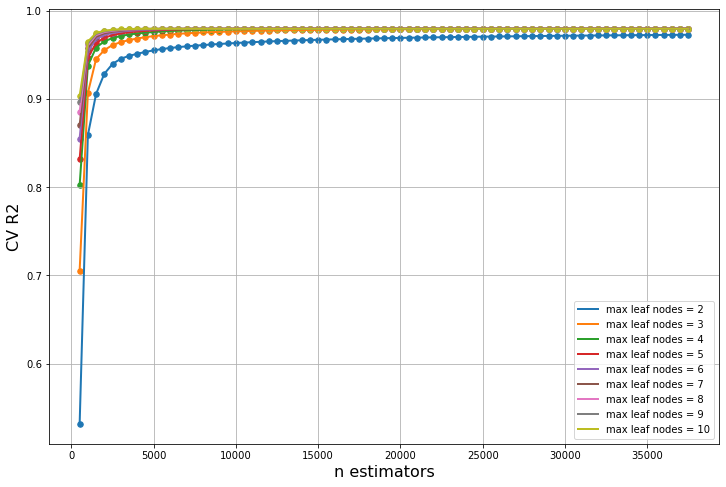

In [72]:
plt.figure(figsize=(12, 8))
plt.xlabel('n estimators', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.grid(True, which='both')

N = len(max_leaf_nodes)
M = len(n_estimators)
for i in range(N):
    plt.scatter(n_estimators, R2_array[:,i], s=30)
    plt.plot(n_estimators, R2_array[:,i], linewidth=2,
             label='max leaf nodes = '+str(max_leaf_nodes[i]))
plt.legend(loc='lower right')
plt.show()

In [73]:
best_model_index = np.argmax(R2_array)
row_index = best_model_index//R2_array.shape[1]
col_index = best_model_index % R2_array.shape[1]
best_n_estimators = n_estimators[row_index]
best_max_leaf_nodes = max_leaf_nodes[col_index]
print('Best Model: n_estimator = %s, max_leaf_nodes = %s' %(best_n_estimators, best_max_leaf_nodes))

Best Model: n_estimator = 16000, max_leaf_nodes = 5


In [74]:
gbr_cv = GradientBoostingRegressor(n_estimators = best_n_estimators, learning_rate = 0.005, max_depth = 20,
                                max_leaf_nodes=best_max_leaf_nodes, min_samples_leaf=10,random_state=99,verbose=0)
gbr_cv.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.005, max_depth=20, max_leaf_nodes=5,
                          min_samples_leaf=10, n_estimators=16000,
                          random_state=99)

In [75]:
print('Cross-validated R2:', round(R2_array[row_index, col_index], 5))
print('OSR2:', round(OSR2(gbr_cv, X_test, y_test, y_train), 5))

Cross-validated R2: 0.97947
OSR2: 0.9223


In [76]:
pd.DataFrame({'Feature' : X_train.columns, 
              'Importance score': 100*gbr_cv.feature_importances_}).round(1)

,Feature,Importance score
0,PercentageOfBachelorDegree,2.7
1,Per_capita_income,82.6
2,total_law_enforcement,0.3
3,Precipitation,0.7
4,Population,1.6
5,NumAirports,0.1
6,GradRates,0.9
7,CollegeEnrollmentRate,0.1
8,AvgHouseholdSize,0.0
9,Avg18Younger,0.1


In [108]:
from sklearn.metrics import mean_squared_error

y_pred_gbr_cv = gbr_cv.predict(X_test)
decision_tree_mse = mean_squared_error(y_pred, y_test)

print("Test RMSE for decision tree:", decision_tree_mse)

Test RMSE for decision tree: 9040423690.066782


In [109]:
print("Test OSR2 for Gradient Boosting with CV:", OSR2(gbr_cv, X_test, y_test, y_train))
print("Test MAE for Gradient Boosting with CV:", MAE(y_test, y_pred_gbr_cv))
print("Test RMSE for Gradient Boosting with CV:", RMSE(y_test, y_pred_gbr_cv))

Test OSR2 for Gradient Boosting with CV: 0.9222957253762688
Test MAE for Gradient Boosting with CV: 58675.51513437091
Test RMSE for Gradient Boosting with CV: 95081.14266281607


### Performance

In [111]:
performance = {'Random Forest':[OSR2(rf, X_test, y_test, y_train), RMSE(y_test, y_pred_rf), MAE(y_pred_rf, y_test)],
               'Random Forest with cv':[OSR2(rf_cv, X_test, y_test, y_train), RMSE(y_test, y_pred_rf_cv), MAE(y_test, y_pred_rf_cv)],
              'Gradient Boosting':[OSR2(gbr, X_test, y_test, y_train), RMSE(y_test, y_pred_gbr), MAE(y_test, y_pred_gbr)],
              'Gradient Boosting with cv' :[OSR2(gbr_cv, X_test, y_test, y_train), RMSE(y_test, y_pred_gbr_cv), MAE(y_test, y_pred_gbr_cv)]}

performance_tbl = pd.DataFrame(performance, columns=['Random Forest','Random Forest with cv'
                                                     ,'Gradient Boosting', 'Gradient Boosting with cv'])

performance_tbl.index = ['OSR2', 'RMSE', 'MAE']
performance_tbl

,Random Forest,Random Forest with cv,Gradient Boosting,Gradient Boosting with cv
OSR2,0.895520,0.909571,0.753641,0.922296
RMSE,110252.584131,102571.480262,169299.666733,95081.142663
MAE,74161.245388,69411.564108,105101.038647,58675.515134


In [112]:
performance_tbl.to_csv('performance3.csv')

In [134]:
pip install bootstrapped

Note: you may need to restart the kernel to use updated packages.


In [135]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

In [136]:
np.random.seed(30) 
normal_data = np.random.normal(4, 1.5, 50) #mean 4, std 1.5, number of samples 50

In [137]:
def bootstrap(data, metrics,sample =500, random_state=123):
    output_array=np.zeros(sample)
    output_array[:]=np.nan
    for i in range(sample):
        bs_data = np.random.choice(data, len(data), replace=True)
        output_array[i] = metrics(bs_data)
    return output_array

In [138]:
import time

def bootstrap_validation(test_data, test_label, train_label, model, metrics_list, sample=500, random_state=66):
    tic = time.time()
    n_sample = sample
    n_metrics = len(metrics_list)
    output_array=np.zeros([n_sample, n_metrics])
    output_array[:]=np.nan
    print(output_array.shape)
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        bs_predicted = model.predict(bs_data)
        for metrics_iter in range(n_metrics):
            metrics = metrics_list[metrics_iter]
            output_array[bs_iter, metrics_iter]=metrics(bs_predicted,bs_label,train_label)
        #if bs_iter % 100 == 0:
            #print(bs_iter, time.time()-tic)
    output_df = pd.DataFrame(output_array)
    return output_df

In [151]:
def OSR21(predictions, y_test, y_train):
    SSE = np.sum((y_test - predictions)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)             
    return (1 - SSE/SST)

In [ ]:
def accuracy(predictions, y_test, y_train):
    return accuracy_score(y_test, predictions)

In [156]:
bs_output_gbc = bootstrap_validation(X_test, y_test, y_train, gbr_cv,
                                 metrics_list = [OSR21],
                                 sample = 5000)

(5000, 1)


In [157]:
test_gbc = OSR21(y_pred_gbr_cv, y_test, y_train)

CI_0 = np.quantile(bs_output_gbc.iloc[:,0] - test_gbc,np.array([0.025,0.975]))
CI_0[0] = test_gbc - CI_0[1]
CI_0[1] = test_gbc - CI_0[0]
print("95% confidence interval for Boosting Model:" , CI_0)

95% confidence interval for Boosting Model: [0.91472374 0.00757199]
